<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/pytorch_linear_regression(%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.7 MB/s eta 0:00:00


In [2]:
import torchmetrics
import torch

In [3]:
preds = torch.tensor([0,0,1,1,3,2,1])
targets = torch.tensor([0,0,2,1,2,2,1])

accuracy = torchmetrics.Accuracy(task='multiclass',num_classes=4)
accuracy(preds, targets)

tensor(0.7143)

In [4]:
x = torch.randn(100,1)
x = x*10
x

tensor([[ 1.4114e+00],
        [-1.5876e+00],
        [ 6.4063e+00],
        [ 2.0685e+01],
        [-8.4433e-01],
        [ 8.9478e-03],
        [-4.6079e-01],
        [-8.6387e+00],
        [-1.5828e+01],
        [ 9.3021e+00],
        [-1.5255e+01],
        [ 6.8116e+00],
        [-1.4451e+01],
        [-1.5997e+01],
        [ 1.0232e+01],
        [ 1.0348e+01],
        [ 7.7747e+00],
        [-2.5303e+01],
        [-4.6527e+00],
        [-1.3733e+01],
        [-4.0460e+00],
        [-7.3464e+00],
        [ 7.2053e-01],
        [-1.1997e+01],
        [ 2.4547e+00],
        [ 3.1903e+00],
        [ 4.9517e+00],
        [ 1.4857e+01],
        [-5.0318e+00],
        [-2.5456e+01],
        [-1.8612e+00],
        [-6.1585e+00],
        [-1.7211e+01],
        [-5.9294e+00],
        [-9.1061e+00],
        [-1.6792e+00],
        [-4.6002e+00],
        [ 9.3846e+00],
        [-9.6374e+00],
        [-2.2019e+00],
        [-4.0211e+01],
        [ 2.2600e+00],
        [-9.8746e+00],
        [ 2

In [5]:
y = x + torch.randn(100,1)
y

tensor([[ 3.3494e-01],
        [-1.0810e+00],
        [ 5.3286e+00],
        [ 1.9215e+01],
        [-1.0296e+00],
        [-8.4118e-01],
        [-1.4556e+00],
        [-8.3481e+00],
        [-1.5426e+01],
        [ 8.4729e+00],
        [-1.5109e+01],
        [ 7.2185e+00],
        [-1.3593e+01],
        [-1.6842e+01],
        [ 1.0703e+01],
        [ 9.6747e+00],
        [ 7.6532e+00],
        [-2.5896e+01],
        [-5.0114e+00],
        [-1.3092e+01],
        [-2.3603e+00],
        [-6.7548e+00],
        [ 6.6131e-01],
        [-1.1457e+01],
        [ 3.2448e+00],
        [ 4.3381e+00],
        [ 6.1419e+00],
        [ 1.4682e+01],
        [-6.7735e+00],
        [-2.5138e+01],
        [-6.4662e-01],
        [-7.2845e+00],
        [-1.8280e+01],
        [-6.8086e+00],
        [-9.2156e+00],
        [-1.9214e+00],
        [-3.1186e+00],
        [ 1.1622e+01],
        [-1.0465e+01],
        [-6.9820e-01],
        [-4.0620e+01],
        [ 1.4847e+00],
        [-9.5170e+00],
        [ 1

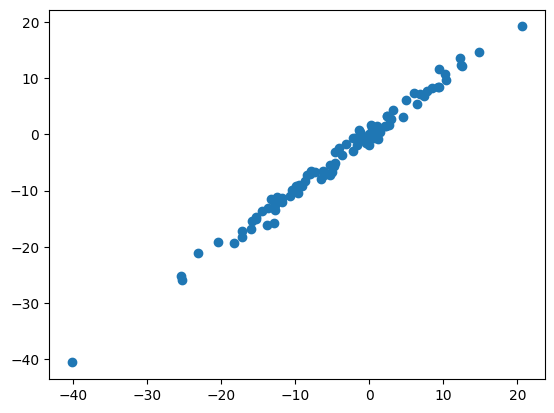

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [8]:
import torch.nn as nn

class LRModel(nn.Module):
    def __init__(self):
        super(LRModel,self).__init__()
        self.layer = nn.Linear(1,1)

    def forward(self,x):
        x = self.layer(x)
        return x

model = LRModel()
model

LRModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
w,b = model.parameters()
w

Parameter containing:
tensor([[0.1706]], requires_grad=True)

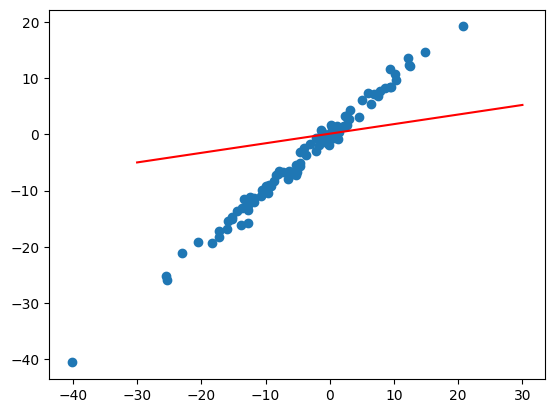

In [10]:
import numpy as np

w1 = w[0][0].item()
b1 = b[0].item()

x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.scatter(x,y)
plt.plot(x1,y1,'r')
plt.show()

In [31]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

epochs = 20
cri_list = []

for epoch in range(epochs):
    optimizer.zero_grad()

    out = model(x)
    loss = criterion(out,y)
    cri_list.append(loss.item())
    loss.backward()

    optimizer.step()

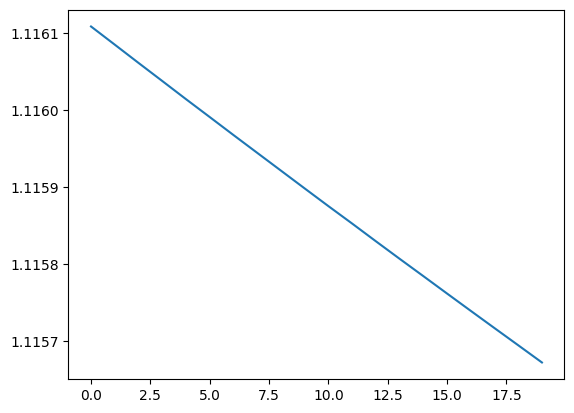

In [32]:
plt.plot(range(epochs),cri_list)
plt.show()

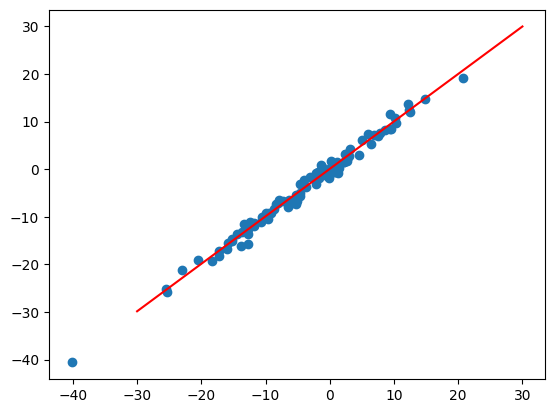

In [33]:
v,b = model.parameters()

w1 = w[0][0].item()
b1 = b[0].item()

x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.scatter(x,y)
plt.plot(x1,y1,'r')
plt.show()

In [34]:
model.state_dict()

OrderedDict([('layer.weight', tensor([[0.9977]])),
             ('layer.bias', tensor([0.0723]))])

In [35]:
torch.save(model.state_dict(),'LRmodel.pth')

In [37]:
model_lr = LRModel() #새로운 파일에서 열때는 class 객체를 만들어야함
print(model_lr.state_dict())

model_lr.load_state_dict(torch.load('LRmodel.pth'))
print(model_lr.state_dict())

OrderedDict([('layer.weight', tensor([[-0.0412]])), ('layer.bias', tensor([0.0644]))])
OrderedDict([('layer.weight', tensor([[0.9977]])), ('layer.bias', tensor([0.0723]))])


In [38]:
model_lr(torch.tensor([-30.]))

tensor([-29.8597], grad_fn=<AddBackward0>)